In [1]:
from keras.models import Sequential   #DeepLearning Libraries
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Embedding
from keras.optimizers import Adam
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.preprocessing.text import Tokenizer   #preprocessing
from keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
train_image = drive.CreateFile({'id' : '18keD3rntMU1ErXYXYR6jKTe2VXZPa0VU'})
train_image.GetContentFile('train_pos_full.txt')
train_image = drive.CreateFile({'id' : '1_E6c3Qe05hwSZzy0goTYrmB2wb-5Y2tb'})
train_image.GetContentFile('train_neg_full.txt')

In [0]:
pos_tweet = [line.rstrip('\n') for line in open('train_pos_full.txt')] #Eureka
neg_tweet = [line.rstrip('\n') for line in open('train_neg_full.txt')]

In [7]:
neg_tweet[:5]

['vinco tresorpack 6 ( difficulty 10 of 10 object : disassemble and reassemble the wooden pieces this beautiful wo ... <url>',
 'glad i dot have taks tomorrow ! ! #thankful #startho',
 '1-3 vs celtics in the regular season = were fucked if we play them in the playoffs',
 "<user> i could actually kill that girl i'm so sorry ! ! !",
 '<user> <user> <user> i find that very hard to believe im afraid']

In [8]:
pos_tweet[:5]

['<user> i dunno justin read my mention or not . only justin and god knows about that , but i hope you will follow me #believe 15',
 "because your logic is so dumb , i won't even crop out your name or your photo . tsk . <url>",
 '" <user> just put casper in a box ! " looved the battle ! #crakkbitch',
 "<user> <user> thanks sir > > don't trip lil mama ... just keep doin ya thang !",
 'visiting my brother tmr is the bestest birthday gift eveerrr ! ! !']

In [9]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Package stopwords is already up-to-date!

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [0]:
posneg_no_stop = []
bwords = stopwords.words('english')[:45]
bwords.append('<user>')

In [11]:
bwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 '<user>']

In [0]:
for line in pos_tweet :   #Removing stopwords from postive tweets
  sum = ''
  for w in line.split() :
    if w not in bwords :
      sum = sum + w + ' '
  posneg_no_stop.append(sum.strip())

for line in neg_tweet :    #Removing stopwords from negative tweets
  sum = ''
  for w in line.split() :
    if w not in bwords :
      sum = sum + w + ' '
  posneg_no_stop.append(sum.strip())

**All tweets appended to a single list so that a single tokenizer could be used on all samples**

In [13]:
posneg_no_stop[0:5]

['dunno justin read mention or not . only justin and god knows about , but hope will follow #believe 15',
 "because logic is so dumb , won't even crop out name or photo . tsk . <url>",
 '" just put casper in a box ! " looved the battle ! #crakkbitch',
 "thanks sir > > don't trip lil mama ... just keep doin ya thang !",
 'visiting brother tmr is the bestest birthday gift eveerrr ! ! !']

In [14]:
posneg_no_stop[1250000:1250005]

['vinco tresorpack 6 ( difficulty 10 of 10 object : disassemble and reassemble the wooden pieces beautiful wo ... <url>',
 'glad dot have taks tomorrow ! ! #thankful #startho',
 '1-3 vs celtics in the regular season = were fucked if play in the playoffs',
 "could actually kill girl i'm so sorry ! ! !",
 'find very hard to believe im afraid']

**Text tokenization & sequence development for feeding to the ConvNets**

In [0]:
token = Tokenizer()

In [0]:
token.fit_on_texts(posneg_no_stop)

In [17]:
len(token.word_index)

508211

In [0]:
seq = token.texts_to_sequences(posneg_no_stop)

In [19]:
seq[:10]   #word vectors

[[1821,
  493,
  391,
  1029,
  77,
  20,
  88,
  493,
  5,
  243,
  785,
  60,
  16,
  107,
  46,
  38,
  344,
  475],
 [151, 3091, 7, 11, 1705, 268, 133, 10430, 44, 323, 77, 590, 6374, 4],
 [17, 310, 18592, 9, 3, 660, 93866, 1, 2283, 209588],
 [56, 1822, 43, 834, 565, 1390, 17, 225, 1795, 275, 3132],
 [4321, 473, 2399, 7, 1, 4746, 166, 1060, 74253],
 [551, 209589, 152, 711, 2, 195, 35, 45],
 [8675,
  108,
  8,
  18231,
  6,
  121,
  280,
  93867,
  121,
  1737,
  3078,
  1524,
  26,
  729,
  111634,
  26,
  21464],
 [4229, 263, 77, 2925, 4229, 18, 25, 55114, 12, 852, 17040],
 [350, 95, 13, 3900, 9, 3, 424],
 [7, 167, 5705]]

In [0]:
p = 0
for i in seq :
  if len(i) > p :
    p = len(i)

In [0]:
seq = pad_sequences(seq,maxlen = p+1,padding = 'post', value = 0)

In [22]:
seq.shape

(2500000, 67)

In [23]:
seq

array([[ 1821,   493,   391, ...,     0,     0,     0],
       [  151,  3091,     7, ...,     0,     0,     0],
       [   17,   310, 18592, ...,     0,     0,     0],
       ...,
       [  201,   105,    16, ...,     0,     0,     0],
       [ 8754,  3292,  2083, ...,     0,     0,     0],
       [ 7430,  1739,    43, ...,     0,     0,     0]], dtype=int32)

**Data Preparation and train test split   (1 : positive tweet  | 0 : Negative Tweet)  **

In [0]:
X = np.asmatrix(seq)

In [0]:
y = np.ones((1250000,1))

In [0]:
y = np.append(y,np.zeros((1250000,1)))

In [0]:
y = np.asmatrix(np.reshape(y,(2500000,1)))

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 92)

In [0]:
X_train = np.array(X_train).reshape((2000000,67,1))
X_test = np.array(X_test).reshape((500000,67,1))


In [0]:
X_train_E = np.array(X_train).reshape((2000000,67))
X_test_E = np.array(X_test).reshape((500000,67))

In [31]:
X_train_E.shape

(2000000, 67)

**ConvNet Architectures (without embedding layer)**

In [116]:
model = Sequential()
model.add(Conv1D(32, 3, input_shape=(65,1), padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(800, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_61 (Conv1D)           (None, 65, 32)            128       
_________________________________________________________________
max_pooling1d_61 (MaxPooling (None, 32, 32)            0         
_________________________________________________________________
conv1d_62 (Conv1D)           (None, 32, 64)            6208      
_________________________________________________________________
max_pooling1d_62 (MaxPooling (None, 16, 64)            0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_33 (Dense)             (None, 800)               820000    
_________________________________________________________________
dropout_25 (Dropout)         (None, 800)               0         
__________

In [117]:
model.fit(X_train, y_train, validation_split = 0.2, epochs=5, batch_size=1000)

Train on 1600000 samples, validate on 400000 samples
Epoch 1/5
1600000/1600000 [==============================] - 38s 24us/step - loss: 3.8436 - acc: 0.5744 - val_loss: 0.6604 - val_acc: 0.6003
Epoch 2/5
 163000/1600000 [==>...........................] - ETA: 30s - loss: 0.6641 - acc: 0.5975

1600000/1600000 [==============================] - 36s 23us/step - loss: 0.6628 - acc: 0.6004 - val_loss: 0.6600 - val_acc: 0.6019
Epoch 3/5
 720000/1600000 [============>.................] - ETA: 18s - loss: 0.6632 - acc: 0.6007

1600000/1600000 [==============================] - 36s 22us/step - loss: 0.6624 - acc: 0.6012 - val_loss: 0.6589 - val_acc: 0.6022
Epoch 4/5
 951000/1600000 [================>.............] - ETA: 13s - loss: 0.6598 - acc: 0.6012

1600000/1600000 [==============================] - 36s 22us/step - loss: 0.6590 - acc: 0.6014 - val_loss: 0.6520 - val_acc: 0.6027
Epoch 5/5
1043000/1600000 [==================>...........] - ETA: 11s - loss: 0.6548 - acc: 0.6017

1600000/1600000 [==============================] - 36s 22us/step - loss: 0.6537 - acc: 0.6015 - val_loss: 0.6451 - val_acc: 0.6024


In [118]:
scores = model.evaluate(X_test,y_test,verbose = 0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 60.16%


**ConvNet Architectures (with embedding layer)**

In [0]:
token.word_index

In [32]:
model1 = Sequential()
model1.add(Embedding(508211, 25, input_length=67))
model1.add(Conv1D(32, 3, input_shape=(67,25), padding='same', activation='relu'))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Conv1D(64, 3, padding='same', activation='relu'))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(800, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 67, 25)            12705275  
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 67, 32)            2432      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 33, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 33, 64)            6208      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 16, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 800)               820000    
__________

In [33]:
history = model1.fit(X_train_E, y_train, validation_split = 0.2, epochs=5, batch_size=1000)

Train on 1600000 samples, validate on 400000 samples
Epoch 1/5
1319000/1600000 [=======================>......] - ETA: 10s - loss: 0.3836 - acc: 0.8210

1600000/1600000 [==============================] - 64s 40us/step - loss: 0.3771 - acc: 0.8248 - val_loss: 0.3452 - val_acc: 0.8433
Epoch 2/5
 763000/1600000 [=============>................] - ETA: 30s - loss: 0.2955 - acc: 0.8703

1600000/1600000 [==============================] - 62s 38us/step - loss: 0.2969 - acc: 0.8695 - val_loss: 0.3427 - val_acc: 0.8467
Epoch 3/5
 549000/1600000 [=========>....................] - ETA: 39s - loss: 0.2412 - acc: 0.8972

1600000/1600000 [==============================] - 61s 38us/step - loss: 0.2475 - acc: 0.8939 - val_loss: 0.3635 - val_acc: 0.8433
Epoch 4/5
 467000/1600000 [=======>......................] - ETA: 41s - loss: 0.2055 - acc: 0.9133

1600000/1600000 [==============================] - 61s 38us/step - loss: 0.2147 - acc: 0.9090 - val_loss: 0.3962 - val_acc: 0.8400
Epoch 5/5
 435000/1600000 [=======>......................] - ETA: 42s - loss: 0.1828 - acc: 0.9232

1600000/1600000 [==============================] - 61s 38us/step - loss: 0.1922 - acc: 0.9188 - val_loss: 0.4289 - val_acc: 0.8381


In [34]:
scores = model1.evaluate(X_test_E,y_test,verbose = 0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 83.83%


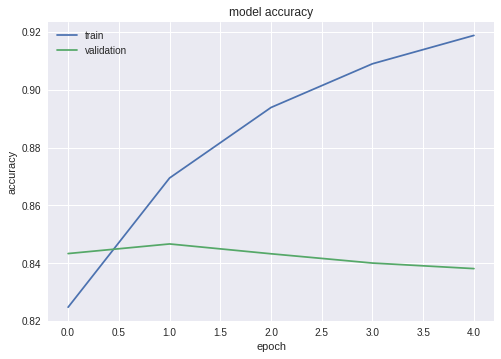

In [35]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()


**Overfitting at its best...  ¯\_(ツ)_/¯**